## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.models import Sequential,Model
from keras.layers import Dense
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.
/home/guneet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/guneet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/guneet/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/guneet/.local/lib/python3.6/site-packages/tensorflow/python

## Read the Data

In [2]:
df = pd.read_csv('./Dataset/musk_csv.csv')
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


## Data Wrangling and EDA

- Check the data types of columns in the Dataset

In [3]:
#checking data types
df.dtypes

ID                    int64
molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
                      ...  
f163                  int64
f164                  int64
f165                  int64
f166                  int64
class                 int64
Length: 170, dtype: object

- Data statistics

In [4]:
#data statistics
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


- By default describe method doesnot include object type columns. To include them as well, use describe method with all

In [5]:
#checking data description of object type variables also
df.describe(include='all')

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598,6598,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
unique,NaN,102,6598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NON-MUSK-j146,j147_1+197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3299.50000,NaN,NaN,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,NaN,NaN,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,NaN,NaN,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,NaN,NaN,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,NaN,NaN,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,NaN,NaN,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000


In [6]:
##checking unique values in conformation name column
df['conformation_name'].value_counts()

j147_1+197    1
j147_2+38     1
j147_3+139    1
252_1+23      1
252_4+141     1
             ..
211_1+12      1
jf79_1+4      1
252_2+133     1
j147_1+233    1
f146_1+254    1
Name: conformation_name, Length: 6598, dtype: int64

In [7]:
#since each name is unique, dropping this column as well
df.drop(['ID','molecule_name','conformation_name'], axis=1, inplace=True)

- checking the percentage of positive and negative class

In [8]:
All = df.shape[0]
musk = df[df['class'] == 1]
non_musk = df[df['class'] == 0]
x = len(musk)/All
y = len(non_musk)/All
print('musk :',x*100,'%')
print('non musk :',y*100,'%')

musk : 15.413761745983631 %
non musk : 84.58623825401637 %


- plotting histogram for class distribution

Text(0, 0.5, 'Frequency')

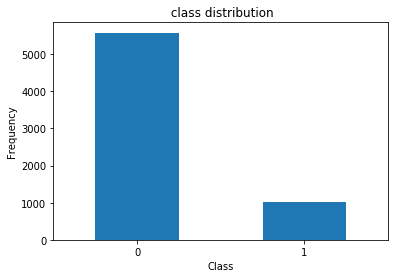

In [9]:
labels = ['non musk','musk']
classes = pd.value_counts(df['class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title(" class distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

- Drawing heat map of correlation of features

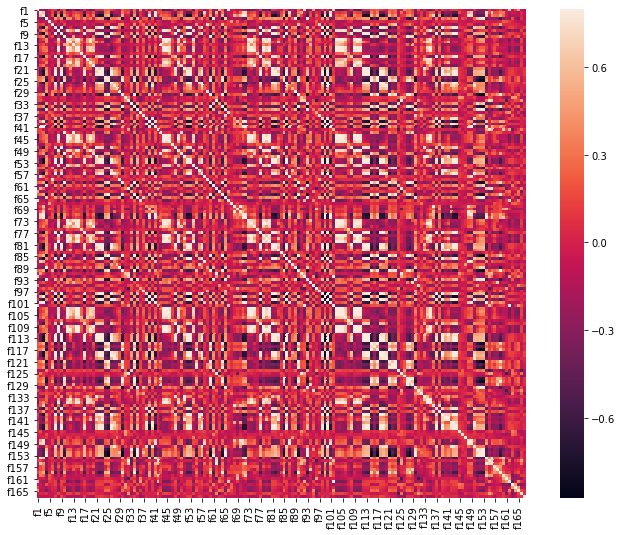

In [10]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

## Splitting Dataset

- Split into Train and Test Set with 80/20 Ratio

In [11]:
X= df.drop(['class'],axis=1)
y= df['class']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [12]:
## checking number of samples in train and test set
print("train samples: ",len(X_train))
print("test samples: ",len(X_test))

train samples:  5278
test samples:  1320


## Data preprocessing

- using standard scaling as preprocessing technique

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

- Will use keras layers to build the model. Model I have choosen contains 5 hidden layers and 1 output layer

In [14]:

model = Sequential()

model.add(Dense(1000, input_shape=(166, ), activation='relu', name='Hidden_layer_1'))
model.add(Dense(500, activation='sigmoid', name='Hidden_layer_2'))
model.add(Dense(250, activation='relu', name='Hidden_layer_3'))
model.add(Dense(100, activation='sigmoid',name='Hidden_layer_4'))
model.add(Dense(50, activation='relu',name='Hidden_layer_5'))
model.add(Dense(1, activation='sigmoid', name='Output_layer'))

- checking Model summary

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_layer_1 (Dense)       (None, 1000)              167000    
_________________________________________________________________
Hidden_layer_2 (Dense)       (None, 500)               500500    
_________________________________________________________________
Hidden_layer_3 (Dense)       (None, 250)               125250    
_________________________________________________________________
Hidden_layer_4 (Dense)       (None, 100)               25100     
_________________________________________________________________
Hidden_layer_5 (Dense)       (None, 50)                5050      
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 51        
Total params: 822,951
Trainable params: 822,951
Non-trainable params: 0
________________________________________________

In [16]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
# fithe model and visualize training using tqdm
model_history = model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=2,
    callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)], validation_data=(X_test,y_test))



Train on 5278 samples, validate on 1320 samples


Epoch 1/40


 - 1s - loss: 0.3644 - acc: 0.8518 - val_loss: 0.1768 - val_acc: 0.9394

Epoch 2/40


 - 1s - loss: 0.1336 - acc: 0.9568 - val_loss: 0.1257 - val_acc: 0.9591

Epoch 3/40


 - 1s - loss: 0.0821 - acc: 0.9727 - val_loss: 0.0667 - val_acc: 0.9742

Epoch 4/40


 - 1s - loss: 0.0530 - acc: 0.9816 - val_loss: 0.0420 - val_acc: 0.9848

Epoch 5/40


 - 1s - loss: 0.0324 - acc: 0.9877 - val_loss: 0.0599 - val_acc: 0.9803

Epoch 6/40


 - 1s - loss: 0.0495 - acc: 0.9837 - val_loss: 0.0298 - val_acc: 0.9879

Epoch 7/40


 - 1s - loss: 0.0177 - acc: 0.9939 - val_loss: 0.0328 - val_acc: 0.9841

Epoch 8/40


 - 1s - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0521 - val_acc: 0.9864

Epoch 9/40


 - 1s - loss: 0.0185 - acc: 0.9936 - val_loss: 0.0243 - val_acc: 0.9917

Epoch 10/40


 - 1s - loss: 0.0133 - acc: 0.9958 - val_loss: 0.0214 - val_acc: 0.9924

Epoch 11/40


 - 1s - loss: 0.0050 - acc: 0.9989 - val_loss: 0.0207 - val_acc: 0.9939

Epoch 12/40


 - 1s - loss: 0.0065 - acc: 0.9981 - val_loss: 0.0188 - val_acc: 0.9924

Epoch 13/40


 - 1s - loss: 0.0015 - acc: 0.9998 - val_loss: 0.0084 - val_acc: 0.9970

Epoch 14/40


 - 1s - loss: 0.0041 - acc: 0.9985 - val_loss: 0.0229 - val_acc: 0.9939

Epoch 15/40


 - 1s - loss: 0.0079 - acc: 0.9973 - val_loss: 0.0262 - val_acc: 0.9947

Epoch 16/40


 - 1s - loss: 0.0218 - acc: 0.9915 - val_loss: 0.0206 - val_acc: 0.9939

Epoch 17/40


 - 1s - loss: 0.0085 - acc: 0.9972 - val_loss: 0.0323 - val_acc: 0.9909

Epoch 18/40


 - 1s - loss: 0.0074 - acc: 0.9977 - val_loss: 0.0066 - val_acc: 0.9977

Epoch 19/40


 - 1s - loss: 0.0025 - acc: 0.9994 - val_loss: 0.0139 - val_acc: 0.9947

Epoch 20/40


 - 1s - loss: 0.0020 - acc: 0.9992 - val_loss: 0.0096 - val_acc: 0.9970

Epoch 21/40


 - 1s - loss: 0.0049 - acc: 0.9987 - val_loss: 0.0152 - val_acc: 0.9955

Epoch 22/40


 - 1s - loss: 0.0018 - acc: 0.9994 - val_loss: 0.0048 - val_acc: 0.9992

Epoch 23/40


 - 1s - loss: 5.2008e-04 - acc: 0.9998 - val_loss: 0.0062 - val_acc: 0.9985

Epoch 24/40


 - 1s - loss: 4.9722e-04 - acc: 0.9998 - val_loss: 0.0040 - val_acc: 0.9992

Epoch 25/40


 - 1s - loss: 1.3696e-04 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 0.9992

Epoch 26/40


 - 1s - loss: 1.0551e-04 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 0.9992

Epoch 27/40


 - 1s - loss: 9.4728e-05 - acc: 1.0000 - val_loss: 0.0035 - val_acc: 0.9992

Epoch 28/40


 - 1s - loss: 8.5447e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 0.9992

Epoch 29/40


 - 1s - loss: 7.7782e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 0.9992

Epoch 30/40


 - 1s - loss: 7.1028e-05 - acc: 1.0000 - val_loss: 0.0036 - val_acc: 0.9992

Epoch 31/40


 - 0s - loss: 6.5222e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9992

Epoch 32/40


 - 0s - loss: 6.0057e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9992

Epoch 33/40


 - 1s - loss: 5.5513e-05 - acc: 1.0000 - val_loss: 0.0037 - val_acc: 0.9992

Epoch 34/40


 - 1s - loss: 5.1441e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9992

Epoch 35/40


 - 1s - loss: 4.7774e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9992

Epoch 36/40


 - 1s - loss: 4.4460e-05 - acc: 1.0000 - val_loss: 0.0038 - val_acc: 0.9992

Epoch 37/40


 - 1s - loss: 4.1486e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 0.9992

Epoch 38/40


 - 1s - loss: 3.8801e-05 - acc: 1.0000 - val_loss: 0.0039 - val_acc: 0.9992

Epoch 39/40


 - 1s - loss: 3.6360e-05 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 0.9992

Epoch 40/40


 - 1s - loss: 3.4121e-05 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 0.9992




## Plotting Curves for Accuracy and Loss

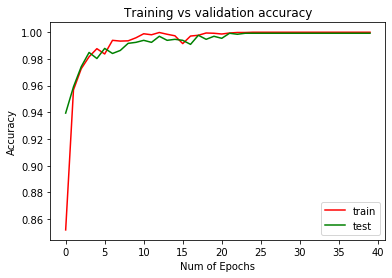

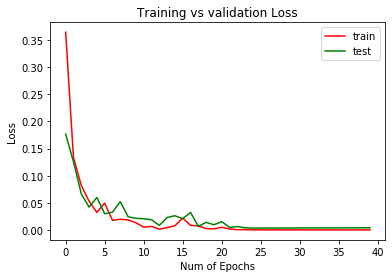

In [18]:
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.title('Training vs validation accuracy')
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.title('Training vs validation Loss')
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.legend(['train','test'])


plt.show()

## Evaluate the Model

In [19]:
## Evaluate the trained model
loss, acc = model.evaluate(x=X_test, y=y_test, batch_size=128, verbose=1, sample_weight=None, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

print("Loss is:",loss)
print("Accuracy is:",acc)

1320/1320 [==============================] - 0s 23us/step
Loss is: 0.003985343557669142
Accuracy is: 0.9992424249649048


## Plot Confusion matrix

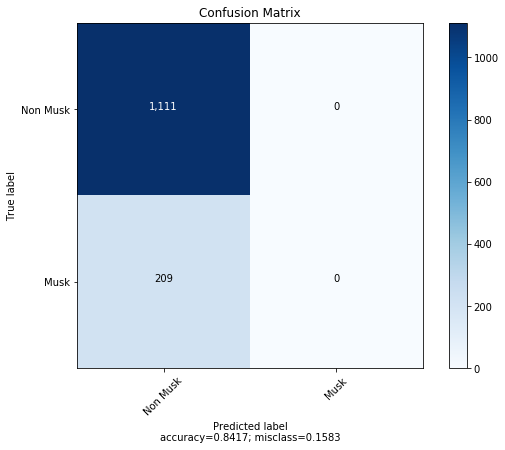

In [20]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

y_pred=model.predict(X_test).astype('int').flatten()
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix,
                      normalize    = False,
                      target_names = ['Non Musk', 'Musk'],
                      title        = "Confusion Matrix")

## Classification Report

In [21]:
cls = classification_report(y_test,y_pred)
print(cls)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1111
           1       0.00      0.00      0.00       209

    accuracy                           0.84      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.71      0.84      0.77      1320



/home/guneet/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Save the